#  Decision Trees
source of code tutorial: [link 1,](https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python)[link 2.](https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/)

Bank dataset set: [link](http://archive.ics.uci.edu/ml/datasets/banknote+authentication)
- Decision trees are a popular prediction method due to their intepretability.
- Decision trees also serve as the building blocks for advanced prediction methods/models such as bagging, random forests, and gradient boosting.

The tutorial is organized into five parts:
1. Gini Index.
2. Create Split.
3. Build a Tree.
4. Make a Prediction.
5. Banknote Case Study.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set(style="darkgrid")

##  Gini index/cost function
The Gini index is the name of the cost function used to evaluate splits in the dataset.

A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split. A perfect separation results in a Gini score of 0, whereas the worst case split that results in 50/50 classes in each group result in a Gini score of 0.5 (for a 2 class problem).

In [2]:
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val)/size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

In [39]:
print(gini_index([[[1, 0], [1, 1]], [[1, 1], [1, 0]]], [0, 1]))
print(gini_index([[[1, 0], [1, 0]], [[1, 1], [1, 1]]], [0, 1]))

0.5
0.0


Entropy for a branch: $E(S) = \sum^c_i-p_ilog_2p_i$

Entropy index for the split point: $E_{split}=\frac{N_1}{N}E_1+\frac{N_2}{N}E_2$

In [4]:
# Cross entropy loss function for nodes
def entropy_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    e_split = 0.0
    epsilon = 1e-12
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        grp_entr = 0.0
        for clazz in classes:
            p = [row[-1] for row in group].count(clazz)/size
            if p == 0.0:
                p = epsilon
            grp_entr += -1.0 * p * np.log2(p)
        e_split += (size/n_instances) * grp_entr
    return e_split

In [5]:
print(entropy_index([[[1, 0], [1, 1]], [[1, 1], [1, 0]]], [0, 1]))
print(entropy_index([[[1, 0], [1, 0]], [[1, 1], [1, 1]]], [0, 1]))

1.0
3.986313713864835e-11


## Create split
Creating a split involves three parts, the first we have already looked at which is calculating the Gini score. The remaining two parts are:
- Splitting a Dataset.
- Evaluating All Splits.


###  Splitting a dataset
Splitting a dataset involves iterating over each row, checking if the attribute value is below or above the split value and assigning it to the left or right group respectively.

In [6]:
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

### Evaluating all splits

In [20]:
# Select the best split point for a dataset
def get_split(dataset, verbose=False):
    class_values = list(set(row[-1] for row in dataset)) # produces the unique classes in the data e.g. [0,1]
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = entropy_index(groups, class_values)
            if verbose is True:
                print('X%d < %.3f Gini=%.3f'%((index+1), row[index], gini))
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups, 'score':b_score}

In [8]:
df = pd.read_csv('contrived_gini_split_test.csv')

In [9]:
df.head()

,X1,X2,Y
0,2.771245,1.784784,0
1,1.728571,1.169761,0
2,3.678320,2.812814,0
3,3.961043,2.619950,0
4,2.999209,2.209014,0


In [10]:
df_plt = np.array([[i, int(r[-1])] for i, r in enumerate(df.values.tolist())])

In [12]:
df_plt = pd.DataFrame({'x':df_plt[:,0], 'y':df_plt[:,1]})

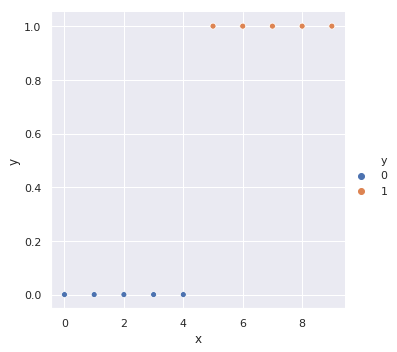

In [13]:
sns.relplot(x='x',y='y',data=df_plt,hue='y')

In [14]:
dataset = df.values.tolist()

In [21]:
split = get_split(dataset, verbose=True)

X1 < 2.771 Gini=0.892
X1 < 1.729 Gini=1.000
X1 < 3.678 Gini=0.604
X1 < 3.961 Gini=0.390
X1 < 2.999 Gini=0.764
X1 < 7.498 Gini=0.604
X1 < 9.002 Gini=0.764
X1 < 7.445 Gini=0.390
X1 < 10.125 Gini=0.892
X1 < 6.642 Gini=0.000
X2 < 1.785 Gini=1.000
X2 < 1.170 Gini=0.892
X2 < 2.813 Gini=0.722
X2 < 2.620 Gini=0.875
X2 < 2.209 Gini=0.965
X2 < 3.163 Gini=0.390
X2 < 3.339 Gini=0.892
X2 < 0.477 Gini=1.000
X2 < 3.235 Gini=0.604
X2 < 3.320 Gini=0.764


In [22]:
print('Split: [X%d < %.5f], score = %.2f' % ((split['index']+1), split['value'], split['score']))

Split: [X1 < 6.64229], score = 0.00


##  Build a tree
Building a tree may be divided into 3 main parts:

1. Terminal Nodes.
2. Recursive Splitting.
3. Building a Tree.

###  Terminal nodes

In [23]:
# create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

###  Recursive splitting

In [24]:
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        # points the left and right branches to the same class
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)

## Building a tree

In [25]:
# Build a decision tree
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

In [26]:
# Print a decision tree
def print_tree(node, depth=0):
    if isinstance(node, dict):
        print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*' ', node)))

In [27]:
tree = build_tree(dataset, 1, 1)
print_tree(tree)

[X1 < 6.642]
 [0.0]
 [1.0]


##  Make a prediction

In [28]:
# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

In [29]:
# predict with a stump
stump = {'index': 0, 'right': 1, 'value': 6.642287351, 'left': 0}

In [30]:
for row in dataset:
    prediction = predict(stump, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1


#  Banknote case study

In [31]:
from random import seed
from random import randrange
from csv import reader

In [32]:
# load a csv file
def load_csv(filename):
    file = open(filename, 'r')
    lines = reader(file)
    dataset = list(lines)
    return dataset

In [33]:
# convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

In [34]:
# split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [35]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [36]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        # constructs the test set
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

In [37]:
# Classification and Regression Tree Algorithm
def decision_tree(train, test, max_depth, min_size):
    tree = build_tree(train, max_depth, min_size)
    predictions = list()
    for row in test:
        prediction = predict(tree, row)
        predictions.append(prediction)
    return predictions

In [38]:
# Test CART on Bank Note dataset
seed(1)
# load an prepare data
dataset = load_csv("data_banknote_authentication.csv")
# convert string attributes to integers
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
# evaluate algorithm
n_folds = 5
max_depth = 10
min_size = 10
scores = evaluate_algorithm(dataset, decision_tree, n_folds, max_depth, min_size)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%'%(sum(scores)/float(len(scores))))

Scores: [97.44525547445255, 98.17518248175182, 97.8102189781022, 98.54014598540147, 97.08029197080292]
Mean Accuracy: 97.810%
